In [19]:
import gym
import numpy as np
from collections import defaultdict
from mc_prediction_state_value import monte_carlo_prediction
import matplotlib.pyplot as plt


In [14]:
env = gym.make('Blackjack-v1')

In [15]:
def sample_policy(observation):
    score, _, _ = observation
    return 0 if score >= 20 else 1

In [22]:
V = monte_carlo_prediction(sample_policy, env, num_episodes=10000)

100%|██████████| 10000/10000 [00:00<00:00, 10367.04it/s]


In [23]:
def plot_blackjack_values(V):
    
    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in V:
            return V[x,y,usable_ace]
        else:
            return 0

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(1, 11)
        X, Y = np.meshgrid(x_range, y_range)
        
        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.set_zlabel('State Value')
        ax.view_init(ax.elev, -120)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(211, projection='3d')
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

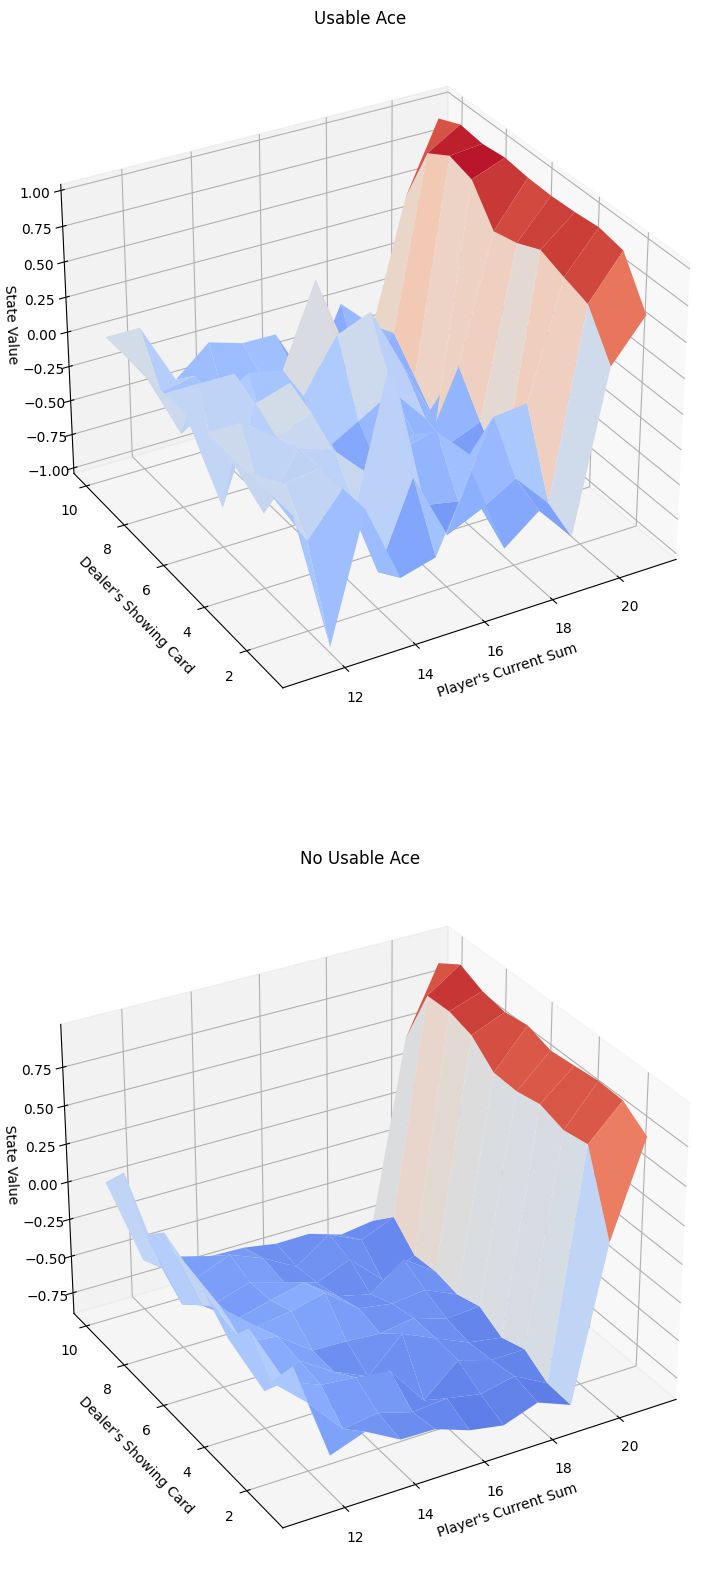

In [24]:
plot_blackjack_values(V)